# Predict Hotel booking cancellations - DHAUZ


## Problem statement: 

Você foi contratado pela DHAUZ como cientista de dados para analisar uma base de dados de clientes
de uma rede de Hotéis e sua tarefa é investigar os dados em busca de insights que possam ajudar a
empresa a evitar cancelamentos e também construir um modelo preditivo que possa antecipar esses
cancelamentos, de modo que a empresa tenha tempo hábil para agir com ações de retenção.

#### Dataset:

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [381]:
hotel_df = pd.read_csv('cancellation_prediction.csv')

In [3]:
hotel_df.head(5)

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,...,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,Fancy Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,3,No Deposit,NaN,NaN,0,0.0,0,0
1,Fancy Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,4,No Deposit,NaN,NaN,0,0.0,0,0
2,Fancy Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,NaN,NaN,0,75.0,0,0
3,Fancy Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,304.0,NaN,0,75.0,0,0
4,Fancy Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,0,No Deposit,240.0,NaN,0,98.0,0,1


In [382]:
hotel_df.shape

(119390, 28)

In [383]:
hotel_df.isnull().sum()

type                                    0
cancellation                            0
days_between_booking_arrival            0
year_arrival_date                       0
month_arrival_date                      0
week_number_arrival_date                0
day_of_month_arrival_date               0
num_weekend_nights                      0
num_workweek_nights                     0
num_adults                              0
num_children                            4
num_babies                              0
breakfast                               0
country                               488
market_segment                          0
distribution_channel                    0
repeated_guest                          0
num_previous_cancellations              0
num_previous_stays                      0
reserved_room                           0
changes_between_booking_arrival         0
deposit_policy                          0
id_travel_agency_booking            16340
id_person_booking                 

In [384]:
hotel_df.dtypes

type                                object
cancellation                         int64
days_between_booking_arrival         int64
year_arrival_date                    int64
month_arrival_date                  object
week_number_arrival_date             int64
day_of_month_arrival_date            int64
num_weekend_nights                   int64
num_workweek_nights                  int64
num_adults                           int64
num_children                       float64
num_babies                           int64
breakfast                             bool
country                             object
market_segment                       int64
distribution_channel                 int64
repeated_guest                       int64
num_previous_cancellations           int64
num_previous_stays                   int64
reserved_room                       object
changes_between_booking_arrival      int64
deposit_policy                      object
id_travel_agency_booking           float64
id_person_b

In [385]:
#Drop columns with many null values
hotel_df.isnull().sum() / hotel_df.shape[0]

type                               0.000000
cancellation                       0.000000
days_between_booking_arrival       0.000000
year_arrival_date                  0.000000
month_arrival_date                 0.000000
week_number_arrival_date           0.000000
day_of_month_arrival_date          0.000000
num_weekend_nights                 0.000000
num_workweek_nights                0.000000
num_adults                         0.000000
num_children                       0.000034
num_babies                         0.000000
breakfast                          0.000000
country                            0.004087
market_segment                     0.000000
distribution_channel               0.000000
repeated_guest                     0.000000
num_previous_cancellations         0.000000
num_previous_stays                 0.000000
reserved_room                      0.000000
changes_between_booking_arrival    0.000000
deposit_policy                     0.000000
id_travel_agency_booking        

In [386]:
hotel_df.drop(columns=['id_person_booking', 'id_travel_agency_booking'], inplace=True)

In [387]:
#Impute elements in columns with num values
hotel_df['country'].fillna(hotel_df['country'].mode(), inplace=True)

hotel_df['num_children'].fillna(int(hotel_df['num_children'].mean()), inplace=True)

In [389]:
hotel_df = hotel_df = hotel_df.loc[~((hotel_df['num_children'] == 0) & (hotel_df['num_adults'] == 0) & (hotel_df['num_babies'] == 0))]

- O Processo de análise inicial dos dados é importante para garantir que a base de dados esteja o mais limpa o possível antes das etapas de análise exploratoria de dados e aplicação de modelo de aprendizagem de maquina;
- Além disso é por meio desse processo que é possivel observar como é o formato dos dados e tirar as hipóteses iniciais a respeito do problema.

## Exploratory Data analysis (EDA): 

In [391]:
hotel_df['cancellation'].value_counts(normalize=True)

0    0.629234
1    0.370766
Name: cancellation, dtype: float64

Taxa de aproximadamente 37% de cancelamento para a base de dados

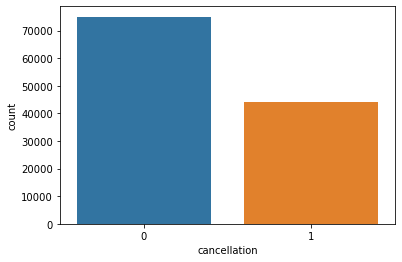

In [392]:
#Unbalanced dataset i should proceed as following
sns.countplot(data=hotel_df, x='cancellation');#hotel_df['cancellation'].value_counts()

In [393]:
hotel_df['month'] = hotel_df['month_arrival_date'].apply(lambda x: datetime.datetime.strptime(x, '%B').month)
hotel_df['arrival_date'] = hotel_df.apply(lambda x : datetime.date(x['year_arrival_date'],  x['month'] , x['day_of_month_arrival_date']), axis=1)
# hotel_df.drop(columns=['month'], inplace=True)

- Ao analisar os dados a respeito do cancelamento é possivel observar a alta taxa de cancelamento de reserva para o período observado. Esse comportamento gera não só desperdicio como também gera prejuizo para os donos de negócio de hotelaria.
- Um ponto que deve ser levado em conta para a modelagem de um algoritmo de Machine learning é que, como os dados de cancelamento estão desbalanceados será necessário tomar algumas precauções ou adotar algumas medidas para evitar a predição incorreta do modelo, entre essas medidas é possível listar: Oversampling e Undersampling das amostrar para o teste; aplicação de modelos de aprendizagem que tenham bom desempenho para classes desbalanceadas; e utilização de métricas adequadas para a avaliação de performance do modelo.

#### Análise de preços

In [394]:
hotel_df['avg_price'].describe()

count    119210.000000
mean        101.856545
std          47.712307
min           0.000000
25%          69.500000
50%          94.950000
75%         126.000000
max         300.000000
Name: avg_price, dtype: float64

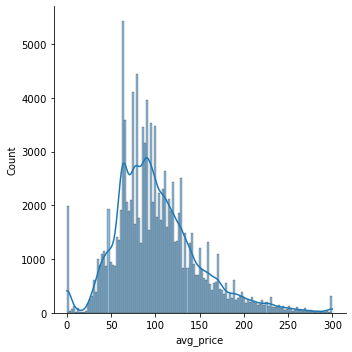

In [141]:
sns.displot(hotel_df, x='avg_price', kde=True)

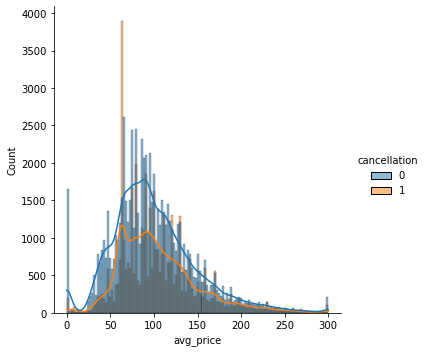

In [395]:
sns.displot(hotel_df, x='avg_price', hue='cancellation', kde=True)

In [ ]:
prices = hotel_df.groupby(['type', 'arrival_date_period'])['avg_price'].mean().reset_index()

- A partir da análise de preço é possível concluir que os preços estão pouco relacionados com o cancelamento de uma reserva, uma vez que a distribuição dos preços possuem o mesmo comportamento para os preços ofertados;
- Todavia existe uma alta taxa de cancelamento de reservas que possuem preço proximo aos 50, uma hipótese que pode ser levantada é de que as acomodações dessa faixa de preço não possuem o custo beneficio adequado, ou na época na qual havia essa precificação, houve uma alta demanda por acomodações e consequentemente um alto indice de ocupação no hotel.

#### Análise de origem dos clientes de outros paises

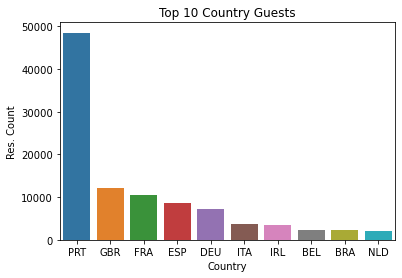

In [396]:
sns.countplot(data=hotel_df, x='country', order=pd.value_counts(hotel_df['country']).iloc[:10].index);
plt.title('Top 10 Country Guests')
plt.xlabel('Country')
plt.ylabel('Res. Count');

In [397]:
hotel_df['country'].value_counts(normalize=True)[:10]

PRT    0.408340
GBR    0.102079
FRA    0.087601
ESP    0.072095
DEU    0.061357
ITA    0.031676
IRL    0.028417
BEL    0.019725
BRA    0.018714
NLD    0.017712
Name: country, dtype: float64

- Aprox. 40% das reservas vieram de portugal, Grã-Bretanha e França vem logo após com 10 e 8%;
- É possível observar uma alta procura de acomodações por parte de pessoas do país de Portugal, e consequentemente maior parte dos cancelamentos;

#### Análise das reservas por data de check-in

In [398]:
#Contagem de reservas por ano
hotel_df.groupby(['cancellation'])['year_arrival_date'].value_counts()

cancellation  year_arrival_date
0             2016                 36299
              2017                 24886
              2015                 13826
1             2016                 20324
              2017                 15734
              2015                  8141
Name: year_arrival_date, dtype: int64

In [406]:
hotel_df['arrival_date_period'] = pd.to_datetime(hotel_df['arrival_date']).dt.to_period('M')
hotel_df.groupby('arrival_date_period').size().reset_index()

,arrival_date_period,0
0,2015-07,2774
1,2015-08,3883
2,2015-09,5109
3,2015-10,4951
4,2015-11,2337
5,2015-12,2913
6,2016-01,2248
7,2016-02,3884
8,2016-03,4819
9,2016-04,5425


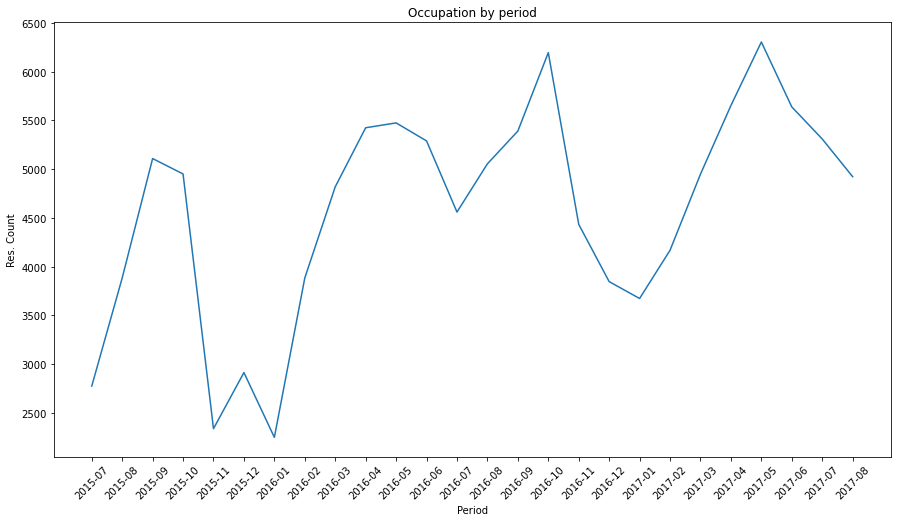

In [484]:
# Fluxo de ocupação das acomodações do hotel por mês
fig, ax = plt.subplots(figsize= (15,8))
arrival_period_df = hotel_df.groupby('arrival_date_period').size().reset_index()
ax = sns.lineplot(data= arrival_period_df, x= arrival_period_df['arrival_date_period'].astype(str), y=0)
plt.title('Occupation by period')
plt.xlabel('Period')
plt.xticks(rotation=45)
plt.ylabel('Res. Count');

A base de dados possui apenas dados a partir de Julho de 2015 até Agosto de 2017 logo não é possivel comparar mês a mês pois estaria comparando dados desbalanceados

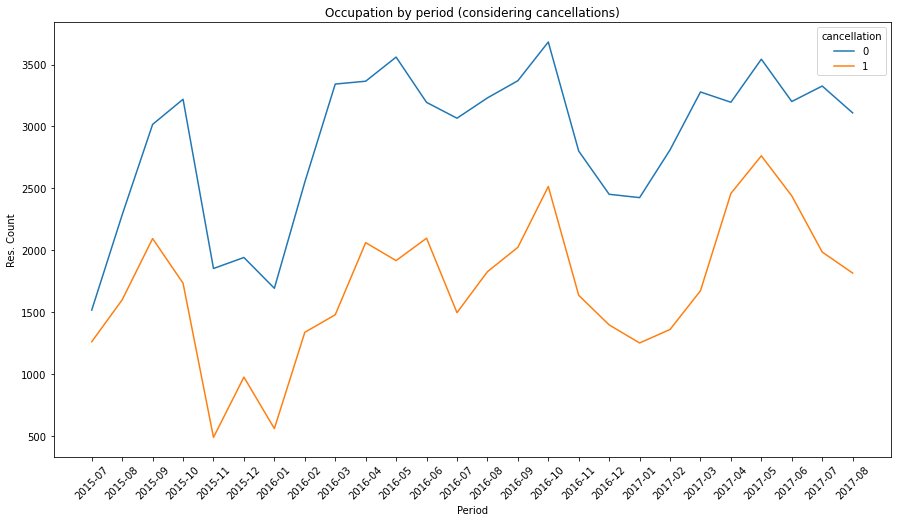

In [408]:
pl = hotel_df.groupby(['cancellation', 'arrival_date_period']).size().reset_index().rename(columns = {0: 'count'})

pl['cancellation'] = pl['cancellation'].astype("category")
fig, ax = plt.subplots(figsize= (15,8))
ax = sns.lineplot(data=pl, x=pl['arrival_date_period'].astype(str), y='count', hue='cancellation')
plt.title('Occupation by period (considering cancellations)')
plt.xlabel('Period')
plt.xticks(rotation=45)
plt.ylabel('Res. Count');

- Ao observar o comportamento dos cancelamentos por período é possivel observar que a sazonalidade dos cancelamentos possui o mesmo comportamento do número de reservas nos hoteis. Ou seja, um alto indice de ocupação leva a um alto indice de cancelamento.

- Estratégias que podem ser sugeridas com base nessa informação são relacionadas à organização das acomodações: melhor distribuição de hospedes, melhor logistica de café da manhã/almoço, otimização no processo de check-in, checkout e serviço de quarto.

#### Análise dos tipos de acomodações/ Hotéis

In [409]:
hotel_df.groupby(['cancellation'])['type'].value_counts(normalize=True)

cancellation  type       
0             Hotel          0.614363
              Fancy Hotel    0.385637
1             Hotel          0.748411
              Fancy Hotel    0.251589
Name: type, dtype: float64

In [410]:
hotel_df.groupby(['cancellation', 'type']).size() / hotel_df.shape[0]

cancellation  type       
0             Fancy Hotel    0.242656
              Hotel          0.386578
1             Fancy Hotel    0.093281
              Hotel          0.277485
dtype: float64

In [411]:
hotel_df['type'].value_counts(normalize=True)

Hotel          0.664063
Fancy Hotel    0.335937
Name: type, dtype: float64

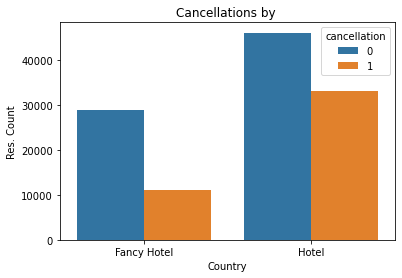

In [412]:
sns.countplot(data=hotel_df, x='type', hue='cancellation');
plt.title('Cancellations by ')
plt.xlabel('Country')
plt.ylabel('Res. Count');

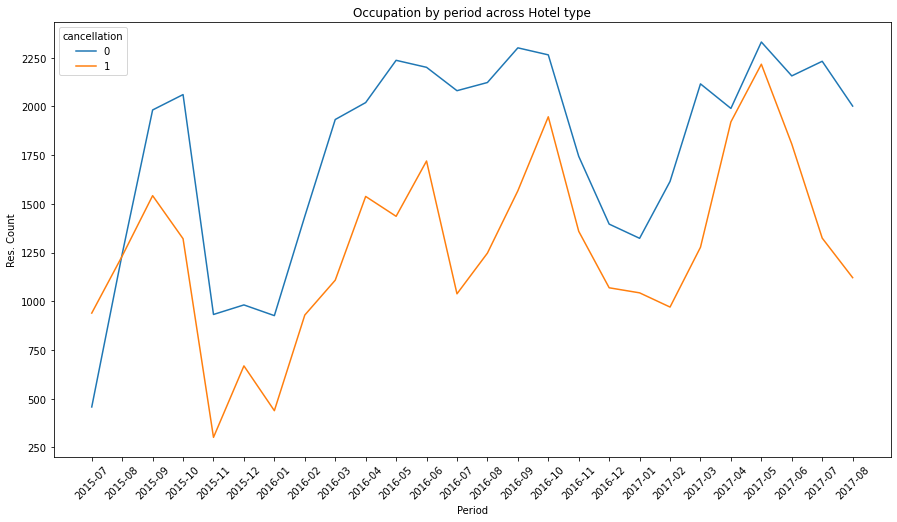

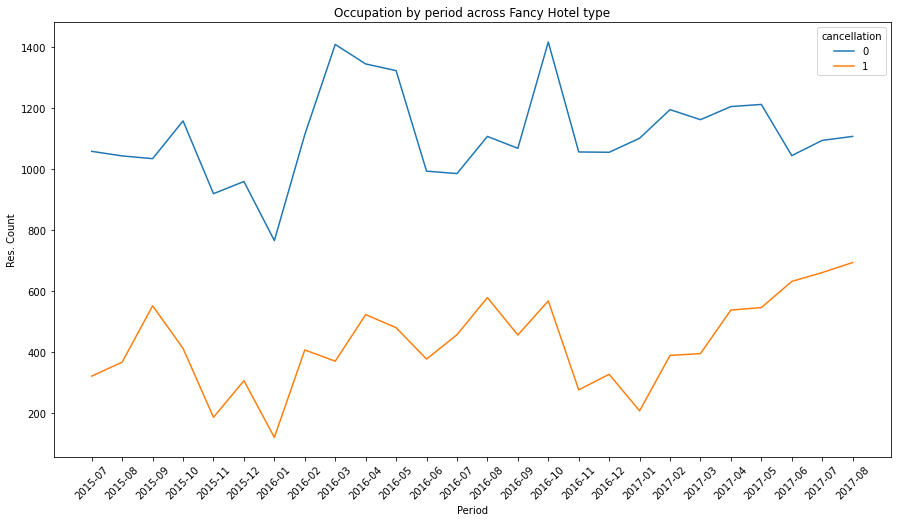

In [413]:
pl_hotel = hotel_df[hotel_df['type'] == 'Hotel'].groupby(['cancellation', 'arrival_date_period']).size().reset_index().rename(columns = {0: 'count'})
pl_fhotel = hotel_df[hotel_df['type'] == 'Fancy Hotel'].groupby(['cancellation', 'arrival_date_period']).size().reset_index().rename(columns = {0: 'count'})

pl_hotel['cancellation'] = pl_hotel['cancellation'].astype("category")
fig, ax = plt.subplots(figsize= (15,8))
ax = sns.lineplot(data=pl_hotel, x=pl_hotel['arrival_date_period'].astype(str), y='count', hue='cancellation')
plt.title('Occupation by period across Hotel type')
plt.xlabel('Period')
plt.xticks(rotation=45)
plt.ylabel('Res. Count')
plt.show();



pl_fhotel['cancellation'] = pl_fhotel['cancellation'].astype("category")
fig, ax = plt.subplots(figsize= (15,8))
ax = sns.lineplot(data=pl_fhotel, x=pl_fhotel['arrival_date_period'].astype(str), y='count', hue='cancellation')
plt.title('Occupation by period across Fancy Hotel type')
plt.xlabel('Period')
plt.xticks(rotation=45)
plt.ylabel('Res. Count')
plt.show();


# plot_facet = sns.FacetGrid(hotel_df.groupby(['arrival_date_period', 'type']).size().reset_index().rename(columns = {0: 'count'}),
#                            col = 'type')
# plot_facet.map(plt.bar, 'arrival_date_period', 'count')



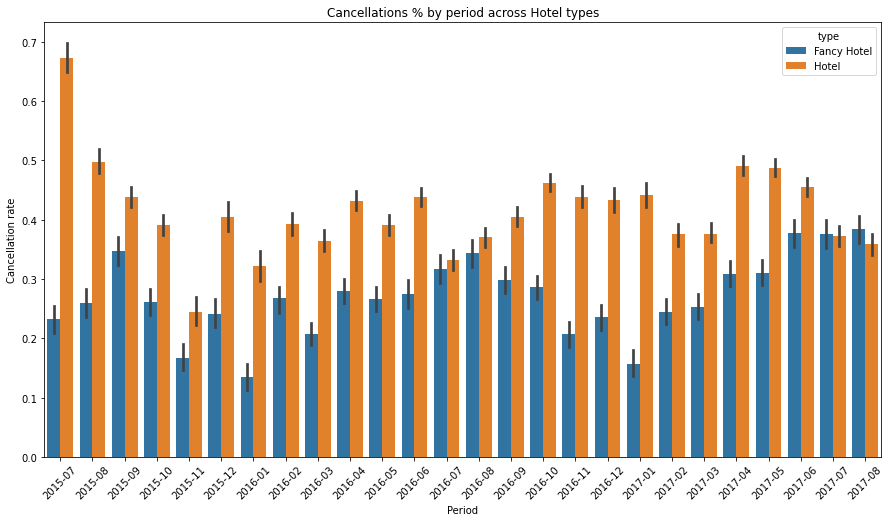

In [414]:
fig, ax = plt.subplots(figsize= (15,8))
ax = sns.barplot(x = hotel_df["arrival_date_period"].astype(str), y = "cancellation", hue="type",data=hotel_df)
plt.title('Cancellations % by period across Hotel types')
plt.xlabel('Period')
plt.xticks(rotation=45)
plt.ylabel('Cancellation rate')
plt.show();

- Proporcionalmente existem mais cancelamentos para reservas em Hoteis do que em hoteis chique
- Existem mais cancelamentos para hoteis (74%) do que em hoteis chique (25%)
- Ainda na questão da melhora do atendimento e do serviço aos hospedes, o fato do índice de cancelamento ser maior em acomodações do tipo "Hotel" é um bom indicativo da aplicação de estrategias voltadas para esse ponto.

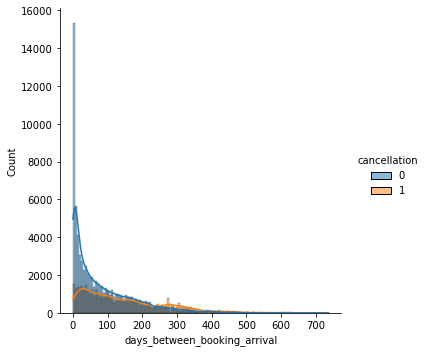

In [418]:
hotel_df['days_between_booking_arrival'].describe()

sns.displot(hotel_df, x='days_between_booking_arrival', hue='cancellation', kde=True)

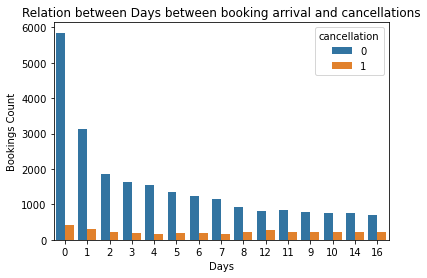

In [487]:
sns.countplot(data=hotel_df, x='days_between_booking_arrival', order=pd.value_counts(hotel_df['days_between_booking_arrival']).iloc[:15].index, hue= 'cancellation');
plt.title('Relation between Days between booking arrival and cancellations')
plt.xlabel('Days')
plt.ylabel('Bookings Count');

- A análise dos dados relacionados à anteecedencia com a qual as pessoas reservam as acomodações no hotel, não apresenta nenhum indicativo de que exista algum problema com o processo de reserva no hotel.

#### Análise das reservas por politicas de depósito/ Estorno

In [415]:
hotel_df.groupby(['cancellation'])['deposit_policy'].value_counts()

cancellation  deposit_policy
0             No Deposit        74792
              Refundable          126
              Non Refund           93
1             No Deposit        29669
              Non Refund        14494
              Refundable           36
Name: deposit_policy, dtype: int64

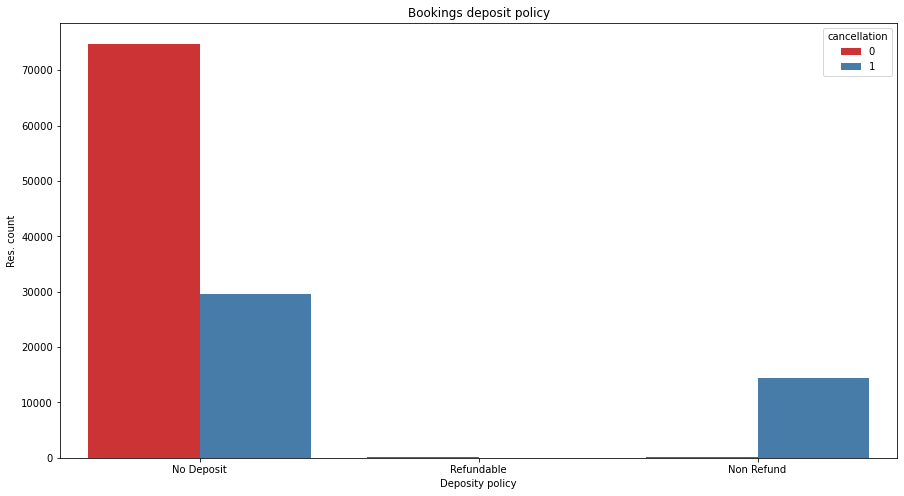

In [416]:
fig, ax = plt.subplots(figsize= (15,8))
ax = sns.countplot(x = 'deposit_policy', hue= "cancellation",data=hotel_df,palette= 'Set1')
plt.title('Bookings deposit policy')
plt.xlabel('Deposity policy')
plt.xticks(rotation=0)
plt.ylabel('Res. count')
plt.show();

In [417]:
hotel_df.groupby(['cancellation', 'type'])['deposit_policy'].value_counts().rename('count').reset_index().sort_values(by='count', ascending=False)

,cancellation,type,deposit_policy,count
3,0,Hotel,No Deposit,46054
0,0,Fancy Hotel,No Deposit,28738
9,1,Hotel,No Deposit,20221
10,1,Hotel,Non Refund,12844
6,1,Fancy Hotel,No Deposit,9448
7,1,Fancy Hotel,Non Refund,1650
1,0,Fancy Hotel,Refundable,120
2,0,Fancy Hotel,Non Refund,69
4,0,Hotel,Non Refund,24
8,1,Fancy Hotel,Refundable,22


- Ao analisar esse indicador, é possivel observar uma forte tendência dos hóspedes em cancelar a estadia em cenários onde não houve nenhuma política de deposito prévio;
- Outro ponto interessante de ser observado é que, houve uma baixa taxa de cancelamento nos cenários onde a estadia possuia algum tipo de reembolso;
- Essa métrica aponta para uma implementação de estratégias mais rígidas de estorno/deposito prévio para estadia.

#### Análise sobre a taxa de pedidos especiais por reserva

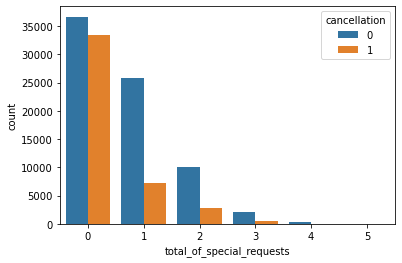

In [420]:
sns.countplot(data=hotel_df, x = 'total_of_special_requests', hue='cancellation');

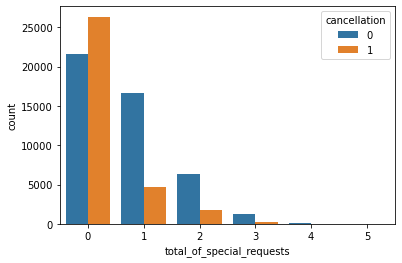

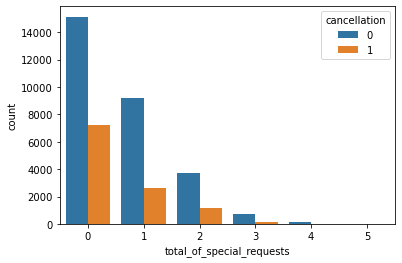

In [421]:
sns.countplot(data=hotel_df[hotel_df['type']=='Hotel'], x = 'total_of_special_requests', hue='cancellation');
plt.show()
sns.countplot(data=hotel_df[hotel_df['type']=='Fancy Hotel'], x = 'total_of_special_requests', hue='cancellation');
plt.show()

 - Com a observação dessa métrica foi possivel perceber que, há uma alta taxa de retenção de reservas que possuem pedidos especiais associadaos.

#### Análise da taxa de clientes recorrentes e clientes que cancelaram previamente

In [422]:
hotel_df['repeated_guest'].value_counts()

0    115455
1      3755
Name: repeated_guest, dtype: int64

In [423]:
pd.crosstab(hotel_df['repeated_guest'], hotel_df['cancellation'], normalize=True)

cancellation,0,1
repeated_guest,,
0,0.602349,0.366152
1,0.026885,0.004614


In [424]:
pd.crosstab(hotel_df['num_previous_cancellations'], hotel_df['cancellation'], normalize=True)

cancellation,0,1
num_previous_cancellations,,
0,0.624713,0.320938
1,0.002819,0.047915
2,0.000638,0.000319
3,0.000377,0.000168
4,0.000201,0.000059
5,0.000143,0.000017
6,0.000126,0.000059
11,0.000210,0.000084
13,0.000008,0.000092


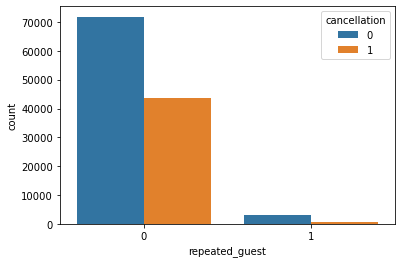

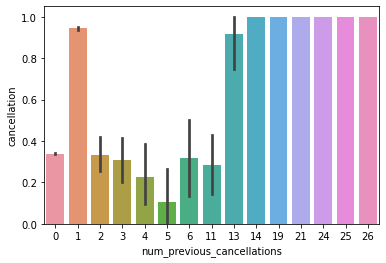

In [425]:
sns.countplot(data=hotel_df, x = 'repeated_guest', hue='cancellation');
plt.show()
sns.barplot(data=hotel_df, x = 'num_previous_cancellations', y='cancellation');
plt.show()

- Com esses dados é possivel levantar 2 pontos importantes a respeito dos clientes e de possiveis estratégias de redução na taxa de cancelamento: 
    - Primeiro ponto é que, o hotel possui um baixo indice de retenção de clientes, consequentemente há uma alta taxa de cancelamento, além disso, clientes recorrentes tendem a não cancelar sua estadia. Isso indica um certo grau de insatisfação com as acomodações ou com o serviço prestado.
    - Outro ponto importante observado é que, hospedes que tenham cancelado uma vez tendem a cancelar novamente sua estadia/reserva. Estrategias relacionadas a estorno/ deposito ainda reforçariam esse ponto. 

<AxesSubplot:>

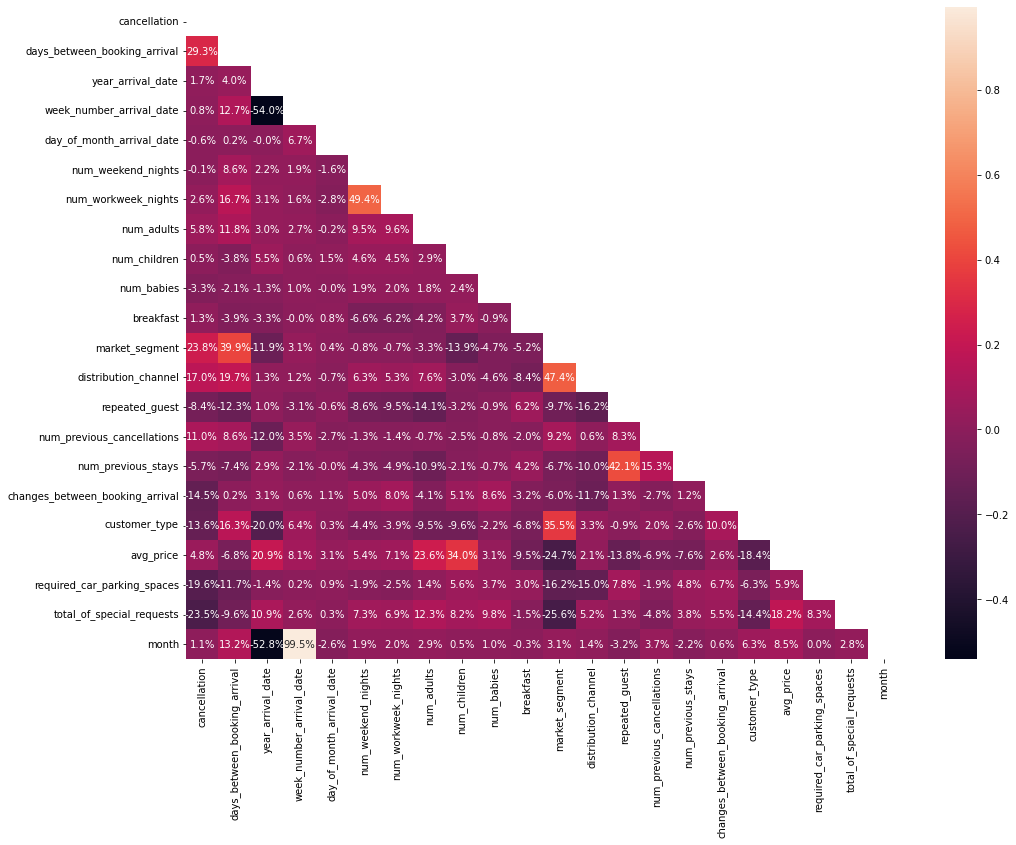

In [426]:
matrix = np.triu(hotel_df.corr())
fig, ax = plt.subplots(figsize= (16,12))
sns.heatmap(hotel_df.corr(), annot= True, mask=matrix, fmt='.1%')

In [427]:
hotel_df.corr()['cancellation'].abs().sort_values(ascending=False)

cancellation                       1.000000
days_between_booking_arrival       0.292876
market_segment                     0.238372
total_of_special_requests          0.234877
required_car_parking_spaces        0.195701
distribution_channel               0.169718
changes_between_booking_arrival    0.144832
customer_type                      0.135986
num_previous_cancellations         0.110139
repeated_guest                     0.083745
num_adults                         0.058182
num_previous_stays                 0.057365
avg_price                          0.048165
num_babies                         0.032569
num_workweek_nights                0.025542
year_arrival_date                  0.016622
breakfast                          0.012786
month                              0.011179
week_number_arrival_date           0.008315
day_of_month_arrival_date          0.005948
num_children                       0.004851
num_weekend_nights                 0.001323
Name: cancellation, dtype: float

Com base em todos os pontos levantados e nos dados observados é possivel levantar algumas informações bastante relevantes que indiquem a motivação por trás do cancelamento das estadias. Dito isso, as variáveis mais relevantes que se correlacionam com o cancelamento são os dias de antecedência na qual o hospede fez a reserva, o segmento de mercado, o total de pedidos especiais e a existencia de estacionamento disponível. Entretanto, é importante tomar cuidado com essa informação pois correlação é diferente de causalidade. Embora existam dados que indiquem que exista uma correlação entre duas variaveis, isso não significa que exista uma relação de causa e efeito entre elas.

### Machine Learning modeling

In [457]:
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [447]:
#making a copy to use on the models
hotel_model_df = hotel_df.drop(columns=['arrival_date', 'arrival_date_period', 'month_arrival_date'])

In [455]:
hotel_model_df.std()

type                               0.472319
cancellation                       0.483012
days_between_booking_arrival       0.002075
year_arrival_date                  0.707485
week_number_arrival_date           0.001297
day_of_month_arrival_date          0.001407
num_weekend_nights                 0.995117
num_workweek_nights                1.897106
num_adults                         0.575186
num_children                       0.398836
num_babies                         0.097509
breakfast                          0.418420
market_segment                     1.420847
distribution_channel               0.681164
repeated_guest                     0.174663
num_previous_cancellations         0.844918
num_previous_stays                 1.498137
reserved_room                      1.161780
changes_between_booking_arrival    0.638504
deposit_policy                     0.655942
customer_type                      0.835985
avg_price                          0.001229
required_car_parking_spaces     

In [448]:
#Encoding categorical variables
hotel_model_df['type'] = hotel_model_df['type'].map({'Hotel': 0, 'Fancy Hotel': 1})
hotel_model_df['deposit_policy'] = hotel_model_df['deposit_policy'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2})
hotel_model_df['reserved_room'] = hotel_model_df['reserved_room'].map({'L': 0,'H': 1,'C': 2,'B': 3,'G': 4,'F': 5,'E': 6,'D': 7,'A': 8 })

In [450]:
#Normalization of numerical features with high std

hotel_model_df['avg_price'] =  preprocessing.normalize(hotel_model_df['avg_price'].values.reshape(1,-1))[0]
hotel_model_df['days_between_booking_arrival'] = preprocessing.normalize(hotel_model_df['days_between_booking_arrival'].values.reshape(1,-1))[0]
hotel_model_df['week_number_arrival_date'] = preprocessing.normalize(hotel_model_df['week_number_arrival_date'].values.reshape(1,-1))[0]
hotel_model_df['day_of_month_arrival_date'] = preprocessing.normalize(hotel_model_df['day_of_month_arrival_date'].values.reshape(1,-1))[0]

In [469]:
hotel_df.corr()['cancellation'].abs().sort_values(ascending=False)

cancellation                       1.000000
days_between_booking_arrival       0.292876
market_segment                     0.238372
total_of_special_requests          0.234877
required_car_parking_spaces        0.195701
distribution_channel               0.169718
changes_between_booking_arrival    0.144832
customer_type                      0.135986
num_previous_cancellations         0.110139
repeated_guest                     0.083745
num_adults                         0.058182
num_previous_stays                 0.057365
avg_price                          0.048165
num_babies                         0.032569
num_workweek_nights                0.025542
year_arrival_date                  0.016622
breakfast                          0.012786
month                              0.011179
week_number_arrival_date           0.008315
day_of_month_arrival_date          0.005948
num_children                       0.004851
num_weekend_nights                 0.001323
Name: cancellation, dtype: float

- Antes da aplicação dos modelos foi necessário realizar mais um tratamento nos dados para utilizá-los como input dos algoritmos de Machine Learning. Duas estratégias adotadas para que seja possível aplicar modelos de classificação nesses dados foi, a normalização dos dados que possuiam alto desvio padrão e a codificação das variáves categoricas para variaveis ordinais, uma vez que, algum dos modelos utilizados não possuem bom comportamento nesse cenário.

- Além disso, como a maioria dos modelos de classificação utilizados utiliza alguma métrica de distância, a normalização dos dados continuos numa mesma escala garante que uma variável não seja penalizada ou bonificada pela escala a qual está disposto os valores da variável.

In [488]:
X = hotel_model_df.drop(columns=['cancellation', 'country', 'year_arrival_date', 'reserved_room', 'days_between_booking_arrival', 'day_of_month_arrival_date'])
y = hotel_model_df['cancellation']
gnb_score=[]
lr_score=[]
rf_score=[]
knn_score= []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_ix, test_ix in kfold.split(X, y):
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    
    
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_score.append({'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred),'f1-score': f1_score(y_test, y_pred)})

    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    gnb_score.append({'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred),'f1-score': f1_score(y_test, y_pred)})

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    lr_score.append({'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred),'f1-score': f1_score(y_test, y_pred)})

    rf = RandomForestClassifier(n_estimators=20)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_score.append({'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred),'f1-score': f1_score(y_test, y_pred)})

 

In [489]:
print(rf_score)
print(lr_score)
print(gnb_score)
print(knn_score)

[{'precision': 0.8160131962948864, 'recall': 0.727570992193687, 'f1-score': 0.7692583732057416}, {'precision': 0.8229007633587786, 'recall': 0.7316742081447963, 'f1-score': 0.7746107784431137}, {'precision': 0.8142875464922406, 'recall': 0.7182126696832579, 'f1-score': 0.7632385646450682}, {'precision': 0.8136566687938737, 'recall': 0.7211538461538461, 'f1-score': 0.7646176911544227}, {'precision': 0.8181934166879306, 'recall': 0.7254524886877828, 'f1-score': 0.7690370548027341}]
[{'precision': 0.9024070021881838, 'recall': 0.4665686163593167, 'f1-score': 0.6151092549779998}, {'precision': 0.9025931575506646, 'recall': 0.468552036199095, 'f1-score': 0.6168739295554397}, {'precision': 0.8998661909009813, 'recall': 0.45644796380090497, 'f1-score': 0.6056739717802462}, {'precision': 0.9008355321020228, 'recall': 0.4634615384615385, 'f1-score': 0.6120406334030475}, {'precision': 0.895464362850972, 'recall': 0.4690045248868778, 'f1-score': 0.6155902004454342}]
[{'precision': 0.4196880995719

In [490]:
rf.feature_importances_

array([0.01249434, 0.12632946, 0.03713724, 0.06166377, 0.02042507,
       0.01099914, 0.00155243, 0.01303625, 0.05917871, 0.01934871,
       0.00327261, 0.0523224 , 0.00590895, 0.02576414, 0.15818489,
       0.02951425, 0.22257853, 0.02849716, 0.05964963, 0.05214231])

- Para a base de dados utilizada e dentre os algoritmos testados é possível concluir o modelo de RandomForest possuiu o melhor balanço entre precisão e revocação, indicado pela metrica F1. Isso indica que, para a base de dados desbalanceada entre as classes, o modelo ainda foi capaz de identificar os possíveis candidatos a cancelamento da reserva.
- Vale destacar no treinamento, a utilização da técnica de validação cruzada K-Fold Cross validation, na versão estratificada  que garante que o treino e teste do modelo é feito mantendo a distribuição das classes.

In [494]:
#Training with temporal splits
gnb_score=[]
lr_score=[]
rf_score=[]
knn_score= []

X_train_temp = hotel_model_df[hotel_model_df['year_arrival_date'].isin([2015, 2016])].drop(columns=['country', 'year_arrival_date', 'reserved_room', 'days_between_booking_arrival', 'day_of_month_arrival_date'])

y_train_temp = X_train_temp['cancellation']

X_train_temp = X_train_temp.drop(columns='cancellation')



X_test_temp = hotel_model_df[hotel_model_df['year_arrival_date'].isin([2017])].drop(columns=['country', 'year_arrival_date', 'reserved_room', 'days_between_booking_arrival', 'day_of_month_arrival_date'])

y_test_temp = X_test_temp['cancellation']


X_test_temp = X_test_temp.drop(columns='cancellation')



knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_score.append({'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred),'f1-score': f1_score(y_test, y_pred)})


gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_score.append({'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred),'f1-score': f1_score(y_test, y_pred)})

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_score.append({'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred),'f1-score': f1_score(y_test, y_pred)})

rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_score.append({'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred),'f1-score': f1_score(y_test, y_pred)})



In [493]:
print(rf_score)
print(lr_score)
print(gnb_score)
print(knn_score)

[{'precision': 0.8160131962948864, 'recall': 0.727570992193687, 'f1-score': 0.7692583732057416}, {'precision': 0.8229007633587786, 'recall': 0.7316742081447963, 'f1-score': 0.7746107784431137}, {'precision': 0.8142875464922406, 'recall': 0.7182126696832579, 'f1-score': 0.7632385646450682}, {'precision': 0.8136566687938737, 'recall': 0.7211538461538461, 'f1-score': 0.7646176911544227}, {'precision': 0.8181934166879306, 'recall': 0.7254524886877828, 'f1-score': 0.7690370548027341}, {'precision': 0.8193423597678917, 'recall': 0.7187782805429864, 'f1-score': 0.7657728231394998}]
[{'precision': 0.9024070021881838, 'recall': 0.4665686163593167, 'f1-score': 0.6151092549779998}, {'precision': 0.9025931575506646, 'recall': 0.468552036199095, 'f1-score': 0.6168739295554397}, {'precision': 0.8998661909009813, 'recall': 0.45644796380090497, 'f1-score': 0.6056739717802462}, {'precision': 0.9008355321020228, 'recall': 0.4634615384615385, 'f1-score': 0.6120406334030475}, {'precision': 0.8954643628509

In [495]:
print(X_train_temp.shape[0]/ hotel_df.shape[0])
print(X_test_temp.shape[0] / hotel_df.shape[0])

0.6592567737605906
0.34074322623940945


- Em relação a validação cruzada utilizado uma separação temporal em relação a uma separação aleatória, é possivel levantar alguns pros e contras de uma abordagem em relação a outra, entretanto dois principais pontos podem ser elaborados:
    - O primeiro ponto é a questão do numero de registros na base de treino e de teste para o caso da separação temporal, enquanto que na amostragem aleatória é possivel garantir uma separação arbitraria de 80-20 entre treino e teste, para esta base de dados não é possivel garantir, uma vez que os dados estão distribuidos do periodo de 07/2015 à 08/2017, logo, não é possivél garantir uma boa confiabilidade nas predições em relação ao tempo;
    - O segundo ponto é que a predição por separação temporal possibilita a identificação de sazonalidade na base de dados, uma vez que pressupõe a forte relação entre a variável de tempo e por meio da predição por data é possível prever a taxa de cancelamento semanal do hotel.
   
- Por fim, para o problema de cancelamento de reserva, é possível afirmar que a estratégia de separação treino-teste aleatória é a mais indicada para a base de dados em questão, uma vez que estamos interessados na taxa de cancelamento geral, com base nas características de uma reserva, e pela questão da base de dados não ser uma intervalo de tempo distribuido igualmente é possivel garantir uma maior acertividade nas predições.